**Ankit Sekseria**<br>
**D19005**

## Exploring best network on MNIST Dataset

### Introduction:
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

### Objective:
Our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

Source of the dataset : [Click here](https://www.kaggle.com/c/digit-recognizer/data)

In [4]:
#importing various modules required
import os
from pathlib import Path  
import torch
from torch.utils.data import TensorDataset ,DataLoader
from torch import nn,optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [20]:
#loading the dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.shape,test.shape

((42000, 785), (28000, 784))

In [21]:
x=train.drop("label",axis=1)  #separating images and target variables
y=np.array(train['label'])
x.shape,y.shape

((42000, 784), (42000,))

In [22]:
torch_X_train = torch.from_numpy(x.values).type(torch.FloatTensor)/255  #scaling
torch_y_train = torch.from_numpy(y).type(torch.LongTensor)
myDataset = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
valid_no  = int(0.2 * len(myDataset))
# so divide the data into trainset and testset
trainSet,testSet = torch.utils.data.random_split(myDataset,(len(myDataset)-valid_no,valid_no))
print(f"len of trainSet {len(trainSet)} , len of testSet {len(testSet)}")
batch_size=64 #stting batch size as 64
train_loader  = DataLoader(trainSet , batch_size=batch_size ,shuffle=True) 
test_loader  = DataLoader(testSet , batch_size=batch_size ,shuffle=True)

len of trainSet 33600 , len of testSet 8400


**Network 1(a)**
- Number of layers:2.
    - Layer 1 : 256 neurons.
    - Layer 2 : 128 neurons.
- optimiser : Adam
- Activation function : ReLU
- Epochs : 10

No Of Parameters 235146
Epoch: 1/10..  Training Loss: 0.287..  Test Loss: 0.197..  Test Accuracy: 0.944
Epoch: 2/10..  Training Loss: 0.164..  Test Loss: 0.160..  Test Accuracy: 0.957
Epoch: 3/10..  Training Loss: 0.126..  Test Loss: 0.196..  Test Accuracy: 0.949
Epoch: 4/10..  Training Loss: 0.127..  Test Loss: 0.194..  Test Accuracy: 0.953
Epoch: 5/10..  Training Loss: 0.110..  Test Loss: 0.170..  Test Accuracy: 0.960
Epoch: 6/10..  Training Loss: 0.091..  Test Loss: 0.173..  Test Accuracy: 0.963
Epoch: 7/10..  Training Loss: 0.092..  Test Loss: 0.218..  Test Accuracy: 0.959
Epoch: 8/10..  Training Loss: 0.084..  Test Loss: 0.188..  Test Accuracy: 0.963
Epoch: 9/10..  Training Loss: 0.076..  Test Loss: 0.209..  Test Accuracy: 0.960
Epoch: 10/10..  Training Loss: 0.098..  Test Loss: 0.232..  Test Accuracy: 0.959


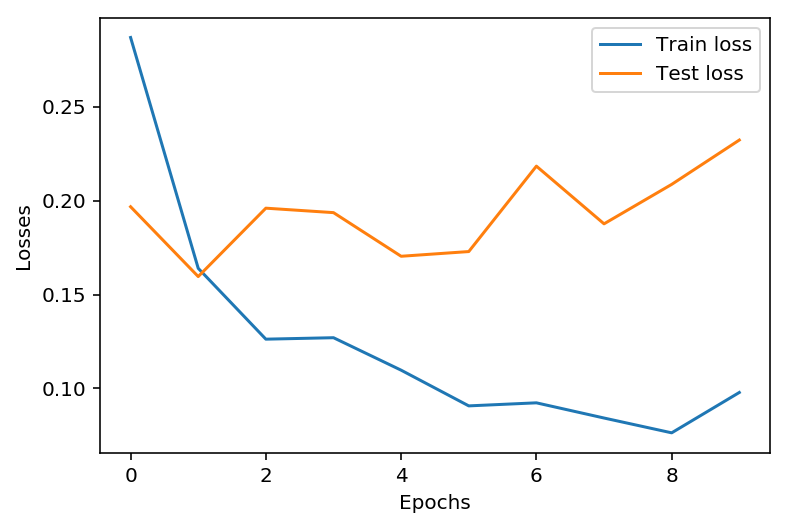

In [79]:
def Adam(epochs):
        #Building the network
    model=nn.Sequential(nn.Linear(784,256),  #layer 1 with 256 neurons.
                        nn.ReLU(),
                        nn.Linear(256,128), #layer 2 with 128 neurons.
                        nn.ReLU(),
                        nn.Linear(128,10),
                        nn.LogSoftmax(dim=1)) 
    optimizer=optim.Adam(model.parameters(),lr=0.01) #Adam optimiser
    criterion=nn.NLLLoss()  #loss
    print("No Of Parameters",sum([p.numel() for p in model.parameters()]))
    images, labels = next(iter(train_loader))
    images = images.view(images.shape[0], -1)

    logits = model(images)
    loss = criterion(logits, labels)


    loss.backward()  #backward loss

    #train
    train_losses,test_losses=[],[]
    for e in range(epochs):  
        running_loss=0
        for images,labels in train_loader:
            optimizer.zero_grad()
            log_ps=model(images)
            loss=criterion(log_ps,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()

        else:
            test_loss=0
            accuracy=0

            with torch.no_grad():
                model.eval()
                for images,labels in test_loader:
                    log_ps=model(images)
                    test_loss+=criterion(log_ps,labels)
                    ps=torch.exp(log_ps)
                    top_p,top_class=ps.topk(1,dim=1)
                    equals=top_class==labels.view(*top_class.shape)
                    accuracy+=torch.mean(equals.type(torch.FloatTensor))
            model.train()
            train_losses.append(running_loss/len(train_loader))  #calculating train loss
            test_losses.append(test_loss/len(test_loader))       #calculating test loss

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
                  "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))
    plt.plot(np.arange(epochs),train_losses,label='Train loss')
    plt.plot(np.arange(epochs),test_losses,label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Losses')
    plt.legend()
    plt.show()
Adam(10)

**Network 1(b)**
- Number of layers:2.
    - Layer 1 : 256 neurons.
    - Layer 2 : 128 neurons.
- optimiser : Adam
- Activation function : ReLU
- Epochs : 5

No Of Parameters 235146
Epoch: 1/5..  Training Loss: 0.281..  Test Loss: 0.175..  Test Accuracy: 0.946
Epoch: 2/5..  Training Loss: 0.166..  Test Loss: 0.186..  Test Accuracy: 0.948
Epoch: 3/5..  Training Loss: 0.129..  Test Loss: 0.152..  Test Accuracy: 0.964
Epoch: 4/5..  Training Loss: 0.113..  Test Loss: 0.146..  Test Accuracy: 0.962
Epoch: 5/5..  Training Loss: 0.118..  Test Loss: 0.194..  Test Accuracy: 0.952


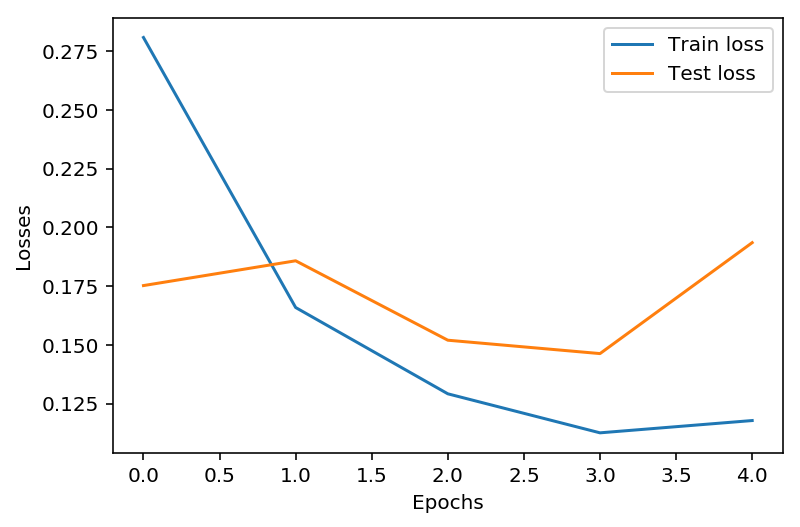

In [80]:
Adam(5)  #calling the function for Adam+ReLU with 2 layers(256,128)

**Observations:**
- Epochs:10
    - As number of epochs increases the difference between train and test loss increases.The model become complex as number  of epochs increases.
    - Validation Accuracy : 95.9 %
- Epochs:5
    - Validation Accuracy : 95.2 %

**Network 2(a)**
- Number of layers:3.
    - Layer 1 : 512 neurons.
    - Layer 2 : 256 neurons.
    - Layer 3:  64  neurons
- optimiser : Adam
- Activation function : ReLU
- Epochs: 10

No Of Parameters 550346
Epoch: 1/10..  Training Loss: 0.339..  Test Loss: 0.255..  Test Accuracy: 0.931
Epoch: 2/10..  Training Loss: 0.182..  Test Loss: 0.196..  Test Accuracy: 0.952
Epoch: 3/10..  Training Loss: 0.148..  Test Loss: 0.150..  Test Accuracy: 0.961
Epoch: 4/10..  Training Loss: 0.136..  Test Loss: 0.172..  Test Accuracy: 0.957
Epoch: 5/10..  Training Loss: 0.112..  Test Loss: 0.153..  Test Accuracy: 0.963
Epoch: 6/10..  Training Loss: 0.099..  Test Loss: 0.159..  Test Accuracy: 0.963
Epoch: 7/10..  Training Loss: 0.107..  Test Loss: 0.192..  Test Accuracy: 0.960
Epoch: 8/10..  Training Loss: 0.098..  Test Loss: 0.193..  Test Accuracy: 0.962
Epoch: 9/10..  Training Loss: 0.101..  Test Loss: 0.201..  Test Accuracy: 0.963
Epoch: 10/10..  Training Loss: 0.091..  Test Loss: 0.161..  Test Accuracy: 0.965


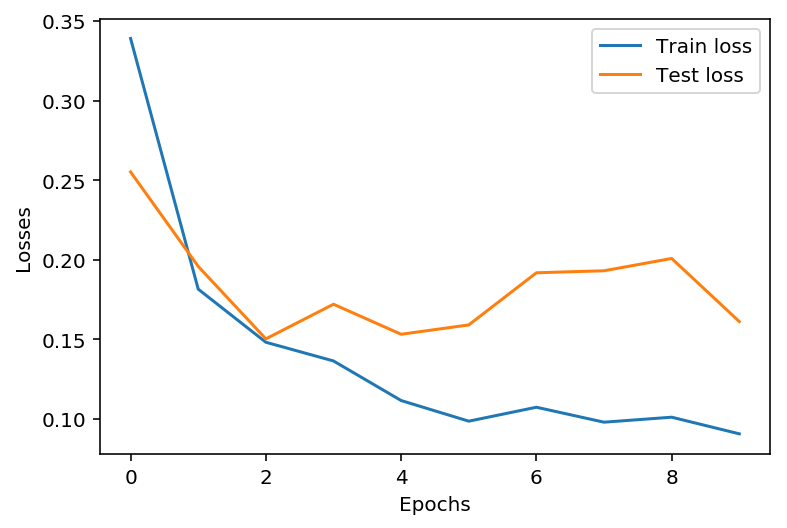

In [81]:
def Adam_3(epochs):
        #Building the network
    model=nn.Sequential(nn.Linear(784,512),  #layer 1 with 256 neurons.
                        nn.ReLU(),
                        nn.Linear(512,256), #layer 2 with 128 neurons.
                        nn.ReLU(),
                        nn.Linear(256,64), #layer 3 with 64 neurons.
                        nn.ReLU(),
                        nn.Linear(64,10),
                        nn.LogSoftmax(dim=1)) 
    optimizer=optim.Adam(model.parameters(),lr=0.01) #Adam optimiser
    criterion=nn.NLLLoss()  #loss
    
    print("No Of Parameters",sum([p.numel() for p in model.parameters()]))

    images, labels = next(iter(train_loader))
    images = images.view(images.shape[0], -1)

    logits = model(images)
    loss = criterion(logits, labels)


    loss.backward()  #backward loss

    #train
    train_losses,test_losses=[],[]
    for e in range(epochs):  
        running_loss=0
        for images,labels in train_loader:
            optimizer.zero_grad()
            log_ps=model(images)
            loss=criterion(log_ps,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()

        else:
            test_loss=0
            accuracy=0

            with torch.no_grad():
                model.eval()
                for images,labels in test_loader:
                    log_ps=model(images)
                    test_loss+=criterion(log_ps,labels)
                    ps=torch.exp(log_ps)
                    top_p,top_class=ps.topk(1,dim=1)
                    equals=top_class==labels.view(*top_class.shape)
                    accuracy+=torch.mean(equals.type(torch.FloatTensor))
            model.train()
            train_losses.append(running_loss/len(train_loader))  #calculating train loss
            test_losses.append(test_loss/len(test_loader))       #calculating test loss

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
                  "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))
    plt.plot(np.arange(epochs),train_losses,label='Train loss')
    plt.plot(np.arange(epochs),test_losses,label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Losses')
    plt.legend()
    plt.show()
Adam_3(10)

**Network 2(b)**
- Number of layers:3.
    - Layer 1 : 512 neurons.
    - Layer 2 : 256 neurons.
    - Layer 3:  64  neurons
- optimiser : Adam
- Activation function : ReLU
- Epochs: 5

No Of Parameters 550346
Epoch: 1/5..  Training Loss: 0.331..  Test Loss: 0.216..  Test Accuracy: 0.944
Epoch: 2/5..  Training Loss: 0.187..  Test Loss: 0.175..  Test Accuracy: 0.952
Epoch: 3/5..  Training Loss: 0.143..  Test Loss: 0.155..  Test Accuracy: 0.959
Epoch: 4/5..  Training Loss: 0.136..  Test Loss: 0.178..  Test Accuracy: 0.956
Epoch: 5/5..  Training Loss: 0.122..  Test Loss: 0.159..  Test Accuracy: 0.964


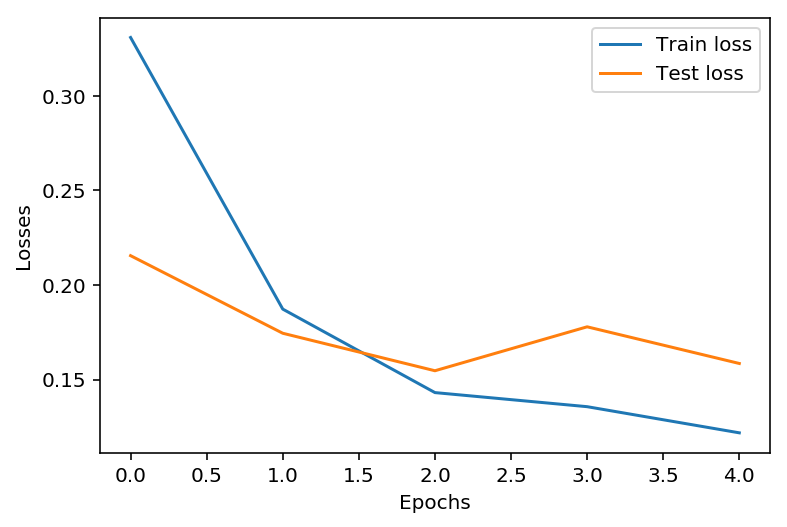

In [82]:
Adam_3(5)

**Observations:**
- Epochs:10
     - Validation Accuracy : 96.5 %
- Epochs:5
    - Validation Accuracy : 96.4 %

**Network 3(a)**
- Number of layers:2.
    - Layer 1 : 512 neurons.
    - Layer 2 : 64 neurons.
- optimiser : Adam
- Activation function : Sigmoid
- Epochs: 10

No Of Parameters 435402
Epoch: 1/10..  Training Loss: 0.319..  Test Loss: 0.146..  Test Accuracy: 0.954
Epoch: 2/10..  Training Loss: 0.116..  Test Loss: 0.115..  Test Accuracy: 0.964
Epoch: 3/10..  Training Loss: 0.085..  Test Loss: 0.114..  Test Accuracy: 0.964
Epoch: 4/10..  Training Loss: 0.065..  Test Loss: 0.099..  Test Accuracy: 0.970
Epoch: 5/10..  Training Loss: 0.058..  Test Loss: 0.110..  Test Accuracy: 0.967
Epoch: 6/10..  Training Loss: 0.051..  Test Loss: 0.111..  Test Accuracy: 0.966
Epoch: 7/10..  Training Loss: 0.049..  Test Loss: 0.121..  Test Accuracy: 0.966
Epoch: 8/10..  Training Loss: 0.046..  Test Loss: 0.109..  Test Accuracy: 0.970
Epoch: 9/10..  Training Loss: 0.043..  Test Loss: 0.105..  Test Accuracy: 0.971
Epoch: 10/10..  Training Loss: 0.046..  Test Loss: 0.100..  Test Accuracy: 0.975


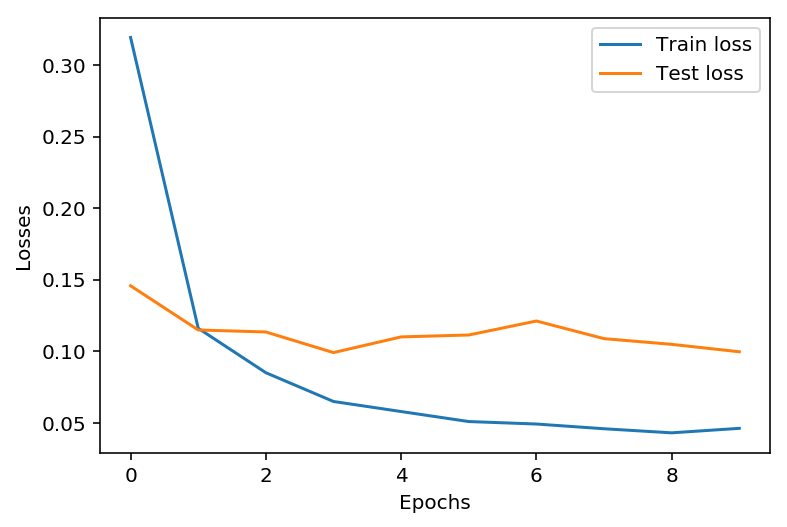

In [83]:
def Adam_sig(epochs):
        #Building the network
    model=nn.Sequential(nn.Linear(784,512),  #layer 1 with 256 neurons.
                        nn.Sigmoid(),
                        nn.Linear(512,64), #layer 2 with 128 neurons.
                        nn.Sigmoid(),
                        nn.Linear(64,10),
                        nn.LogSoftmax(dim=1)) 
    optimizer=optim.Adam(model.parameters(),lr=0.01) #Adam optimiser
    criterion=nn.NLLLoss()  #loss
    
    print("No Of Parameters",sum([p.numel() for p in model.parameters()]))

    images, labels = next(iter(train_loader))
    images = images.view(images.shape[0], -1)

    logits = model(images)
    loss = criterion(logits, labels)


    loss.backward()  #backward loss

    #train
    train_losses,test_losses=[],[]
    for e in range(epochs):  
        running_loss=0
        for images,labels in train_loader:
            optimizer.zero_grad()
            log_ps=model(images)
            loss=criterion(log_ps,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()

        else:
            test_loss=0
            accuracy=0

            with torch.no_grad():
                model.eval()
                for images,labels in test_loader:
                    log_ps=model(images)
                    test_loss+=criterion(log_ps,labels)
                    ps=torch.exp(log_ps)
                    top_p,top_class=ps.topk(1,dim=1)
                    equals=top_class==labels.view(*top_class.shape)
                    accuracy+=torch.mean(equals.type(torch.FloatTensor))
            model.train()
            train_losses.append(running_loss/len(train_loader))  #calculating train loss
            test_losses.append(test_loss/len(test_loader))       #calculating test loss

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
                  "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))
    plt.plot(np.arange(epochs),train_losses,label='Train loss')
    plt.plot(np.arange(epochs),test_losses,label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Losses')
    plt.legend()
    plt.show()
Adam_sig(10)

**Network 3(b)**
- Number of layers:2.
    - Layer 1 : 512 neurons.
    - Layer 2 : 64 neurons.
- optimiser : Adam
- Activation function : Sigmoid
- Epochs: 5

No Of Parameters 435402
Epoch: 1/5..  Training Loss: 0.320..  Test Loss: 0.173..  Test Accuracy: 0.945
Epoch: 2/5..  Training Loss: 0.120..  Test Loss: 0.121..  Test Accuracy: 0.962
Epoch: 3/5..  Training Loss: 0.087..  Test Loss: 0.107..  Test Accuracy: 0.968
Epoch: 4/5..  Training Loss: 0.071..  Test Loss: 0.119..  Test Accuracy: 0.964
Epoch: 5/5..  Training Loss: 0.061..  Test Loss: 0.129..  Test Accuracy: 0.962


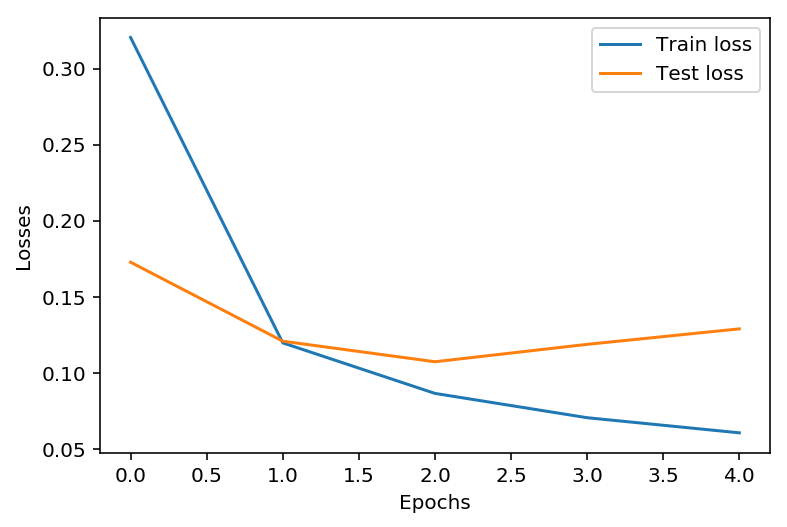

In [84]:
Adam_sig(5)

**Observations:**
- Epochs:10
     - Validation Accuracy : 97.5 %
- Epochs:5
    - Validation Accuracy : 96.2 %

**Network 4(a)**
- Number of layers:2.
    - Layer 1 : 512 neurons.
    - Layer 3 : 64  neurons.
- optimiser : Adam
- Activation function : Sigmoid + ReLU
- Epochs: 10

No Of Parameters 435402
Epoch: 1/10..  Training Loss: 0.323..  Test Loss: 0.154..  Test Accuracy: 0.954
Epoch: 2/10..  Training Loss: 0.125..  Test Loss: 0.146..  Test Accuracy: 0.959
Epoch: 3/10..  Training Loss: 0.089..  Test Loss: 0.125..  Test Accuracy: 0.964
Epoch: 4/10..  Training Loss: 0.079..  Test Loss: 0.131..  Test Accuracy: 0.960
Epoch: 5/10..  Training Loss: 0.070..  Test Loss: 0.128..  Test Accuracy: 0.964
Epoch: 6/10..  Training Loss: 0.066..  Test Loss: 0.139..  Test Accuracy: 0.960
Epoch: 7/10..  Training Loss: 0.061..  Test Loss: 0.154..  Test Accuracy: 0.957
Epoch: 8/10..  Training Loss: 0.056..  Test Loss: 0.130..  Test Accuracy: 0.967
Epoch: 9/10..  Training Loss: 0.049..  Test Loss: 0.141..  Test Accuracy: 0.966
Epoch: 10/10..  Training Loss: 0.052..  Test Loss: 0.138..  Test Accuracy: 0.965


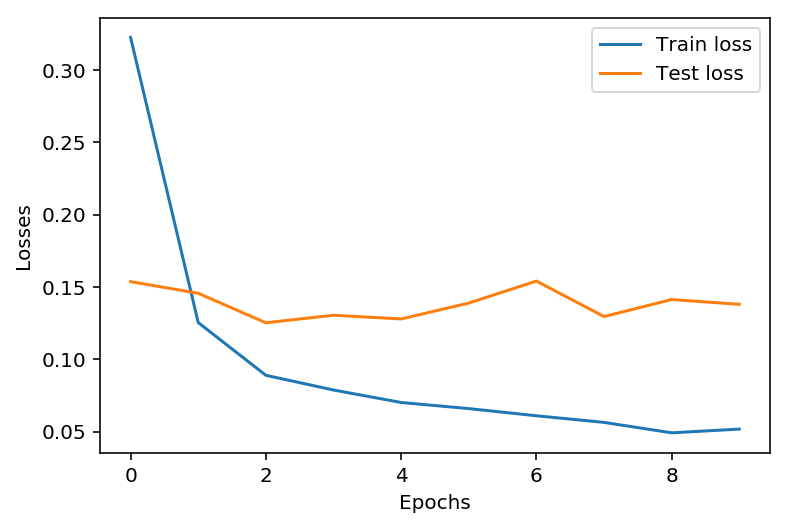

In [85]:
def Adam_sig_relu(epochs):
        #Building the network
    model=nn.Sequential(nn.Linear(784,512),  #layer 1 with 512 neurons.
                        nn.Sigmoid(),
                        nn.Linear(512,64), #layer 2 with 64 neurons.
                        nn.ReLU(),
                        nn.Linear(64,10),
                        nn.LogSoftmax(dim=1)) 
    optimizer=optim.Adam(model.parameters(),lr=0.01) #Adam optimiser
    criterion=nn.NLLLoss()  #loss
    
    print("No Of Parameters",sum([p.numel() for p in model.parameters()]))

    images, labels = next(iter(train_loader))
    images = images.view(images.shape[0], -1)

    logits = model(images)
    loss = criterion(logits, labels)


    loss.backward()  #backward loss

    #train
    train_losses,test_losses=[],[]
    for e in range(epochs):  
        running_loss=0
        for images,labels in train_loader:
            optimizer.zero_grad()
            log_ps=model(images)
            loss=criterion(log_ps,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()

        else:
            test_loss=0
            accuracy=0

            with torch.no_grad():
                model.eval()
                for images,labels in test_loader:
                    log_ps=model(images)
                    test_loss+=criterion(log_ps,labels)
                    ps=torch.exp(log_ps)
                    top_p,top_class=ps.topk(1,dim=1)
                    equals=top_class==labels.view(*top_class.shape)
                    accuracy+=torch.mean(equals.type(torch.FloatTensor))
            model.train()
            train_losses.append(running_loss/len(train_loader))  #calculating train loss
            test_losses.append(test_loss/len(test_loader))       #calculating test loss

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
                  "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))
    plt.plot(np.arange(epochs),train_losses,label='Train loss')
    plt.plot(np.arange(epochs),test_losses,label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Losses')
    plt.legend()
    plt.show()
Adam_sig_relu(10)

**Network 4(b)**
- Number of layers:2.
    - Layer 1 : 512 neurons.
    - Layer 3 : 64  neurons.
- optimiser : Adam
- Activation function : Sigmoid + ReLU
- Epochs: 5

No Of Parameters 435402
Epoch: 1/5..  Training Loss: 0.313..  Test Loss: 0.145..  Test Accuracy: 0.956
Epoch: 2/5..  Training Loss: 0.127..  Test Loss: 0.129..  Test Accuracy: 0.959
Epoch: 3/5..  Training Loss: 0.092..  Test Loss: 0.129..  Test Accuracy: 0.965
Epoch: 4/5..  Training Loss: 0.079..  Test Loss: 0.126..  Test Accuracy: 0.964
Epoch: 5/5..  Training Loss: 0.075..  Test Loss: 0.112..  Test Accuracy: 0.968


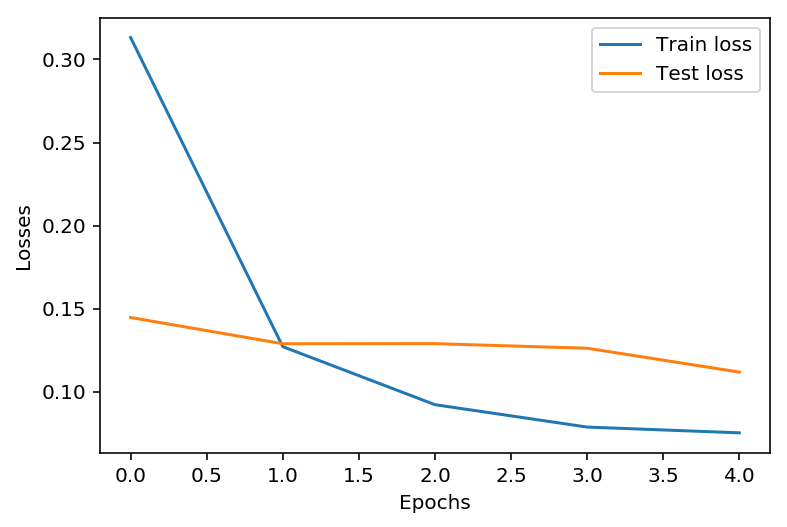

In [86]:
Adam_sig_relu(5)

**Observations:**
- Epochs:10
     - Validation Accuracy : 96.5 %
- Epochs:5
    - Validation Accuracy : 96.8 %

**Network 5(a)**
- Number of layers:3.
    - Layer 1 : 512 neurons.
    - Layer 2 : 256 neurons.
    - Layer 3:  64  neurons
- optimiser : SGD
- Activation function : ReLU
- Epochs: 10

No Of Parameters 550346
Epoch: 1/10..  Training Loss: 2.277..  Test Loss: 2.230..  Test Accuracy: 0.567
Epoch: 2/10..  Training Loss: 1.980..  Test Loss: 1.404..  Test Accuracy: 0.702
Epoch: 3/10..  Training Loss: 0.898..  Test Loss: 0.623..  Test Accuracy: 0.819
Epoch: 4/10..  Training Loss: 0.538..  Test Loss: 0.461..  Test Accuracy: 0.862
Epoch: 5/10..  Training Loss: 0.431..  Test Loss: 0.398..  Test Accuracy: 0.878
Epoch: 6/10..  Training Loss: 0.382..  Test Loss: 0.356..  Test Accuracy: 0.890
Epoch: 7/10..  Training Loss: 0.351..  Test Loss: 0.335..  Test Accuracy: 0.898
Epoch: 8/10..  Training Loss: 0.328..  Test Loss: 0.313..  Test Accuracy: 0.906
Epoch: 9/10..  Training Loss: 0.306..  Test Loss: 0.297..  Test Accuracy: 0.910
Epoch: 10/10..  Training Loss: 0.288..  Test Loss: 0.280..  Test Accuracy: 0.916


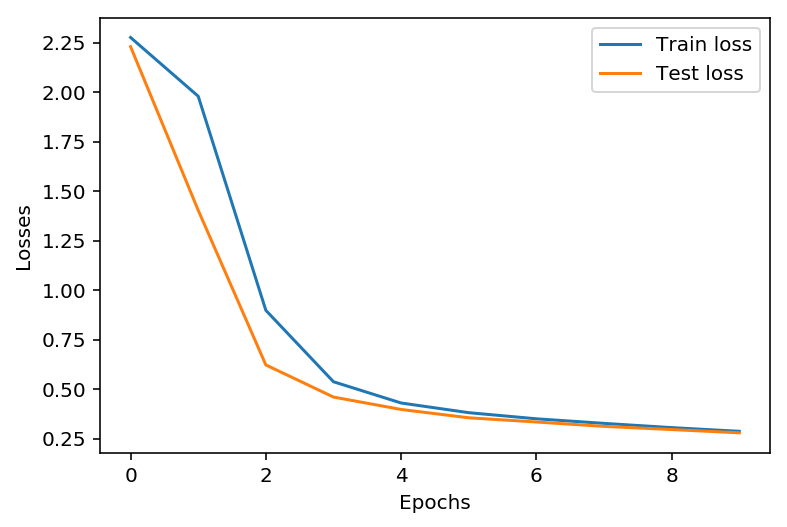

In [87]:
def SGD(epochs):
        #Building the network
    model=nn.Sequential(nn.Linear(784,512),  #layer 1 with 512 neurons.
                        nn.ReLU(),
                        nn.Linear(512,256), #layer 2 with 256 neurons.
                        nn.ReLU(),
                        nn.Linear(256,64),  #Layer 3 with 64 neurons
                        nn.ReLU(),
                        nn.Linear(64,10),
                        nn.LogSoftmax(dim=1)) 
    optimizer=optim.SGD(model.parameters(),lr=0.01) #SGD optimiser
    criterion=nn.NLLLoss()  #loss
    
    print("No Of Parameters",sum([p.numel() for p in model.parameters()]))

    images, labels = next(iter(train_loader))
    images = images.view(images.shape[0], -1)

    logits = model(images)
    loss = criterion(logits, labels)


    loss.backward()  #backward loss

    #train
    train_losses,test_losses=[],[]
    for e in range(epochs):  
        running_loss=0
        for images,labels in train_loader:
            optimizer.zero_grad()
            log_ps=model(images)
            loss=criterion(log_ps,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()

        else:
            test_loss=0
            accuracy=0

            with torch.no_grad():
                model.eval()
                for images,labels in test_loader:
                    log_ps=model(images)
                    test_loss+=criterion(log_ps,labels)
                    ps=torch.exp(log_ps)
                    top_p,top_class=ps.topk(1,dim=1)
                    equals=top_class==labels.view(*top_class.shape)
                    accuracy+=torch.mean(equals.type(torch.FloatTensor))
            model.train()
            train_losses.append(running_loss/len(train_loader))  #calculating train loss
            test_losses.append(test_loss/len(test_loader))       #calculating test loss

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
                  "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))
    plt.plot(np.arange(epochs),train_losses,label='Train loss')
    plt.plot(np.arange(epochs),test_losses,label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Losses')
    plt.legend()
    plt.show()
SGD(10)

**Network 5(b)**
- Number of layers:3.
    - Layer 1 : 512 neurons.
    - Layer 2 : 256 neurons.
    - Layer 3:  64  neurons
- optimiser : SGD
- Activation function : ReLU
- Epochs: 5

No Of Parameters 550346
Epoch: 1/5..  Training Loss: 2.283..  Test Loss: 2.247..  Test Accuracy: 0.367
Epoch: 2/5..  Training Loss: 2.066..  Test Loss: 1.676..  Test Accuracy: 0.541
Epoch: 3/5..  Training Loss: 1.072..  Test Loss: 0.710..  Test Accuracy: 0.797
Epoch: 4/5..  Training Loss: 0.601..  Test Loss: 0.506..  Test Accuracy: 0.853
Epoch: 5/5..  Training Loss: 0.468..  Test Loss: 0.423..  Test Accuracy: 0.873


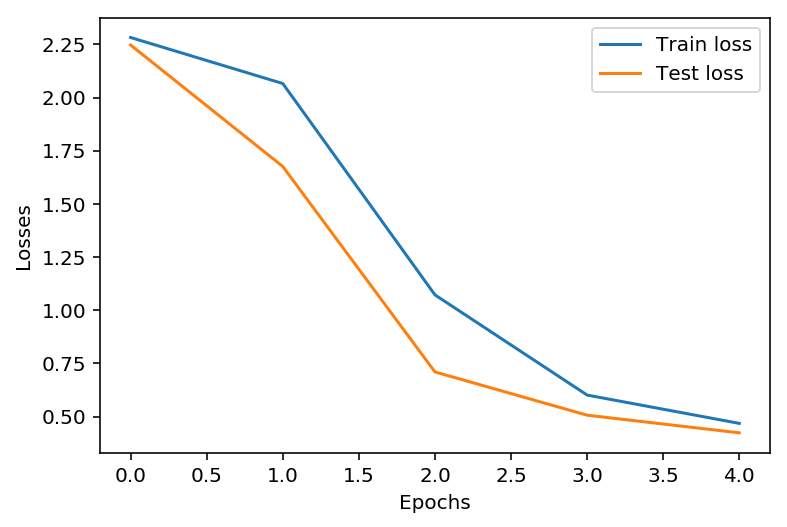

In [88]:
SGD(5)

**Observations:**
- As number of epochs increases the difference between train and test loss decreases.Hence the model does not overfit.
- Initially,the loss is high but as number of epochs increases,it starts to decrease.
- Epochs:10
    - Validation Accuracy : 91.6 %
- Epochs:5
    - Validation Accuracy : 87.3 %

**Network 6(a)**
- Number of layers:2.
    - Layer 1 : 256 neurons.
    - Layer 2:  64  neurons
- optimiser : SGD with momentum
- Activation function : ReLU
- Epochs: 10

No Of Parameters 218058
Epoch: 1/10..  Training Loss: 0.732..  Test Loss: 0.294..  Test Accuracy: 0.912
Epoch: 2/10..  Training Loss: 0.256..  Test Loss: 0.207..  Test Accuracy: 0.937
Epoch: 3/10..  Training Loss: 0.183..  Test Loss: 0.160..  Test Accuracy: 0.951
Epoch: 4/10..  Training Loss: 0.138..  Test Loss: 0.138..  Test Accuracy: 0.958
Epoch: 5/10..  Training Loss: 0.108..  Test Loss: 0.120..  Test Accuracy: 0.965
Epoch: 6/10..  Training Loss: 0.087..  Test Loss: 0.114..  Test Accuracy: 0.965
Epoch: 7/10..  Training Loss: 0.073..  Test Loss: 0.104..  Test Accuracy: 0.968
Epoch: 8/10..  Training Loss: 0.060..  Test Loss: 0.100..  Test Accuracy: 0.971
Epoch: 9/10..  Training Loss: 0.050..  Test Loss: 0.097..  Test Accuracy: 0.972
Epoch: 10/10..  Training Loss: 0.042..  Test Loss: 0.095..  Test Accuracy: 0.971


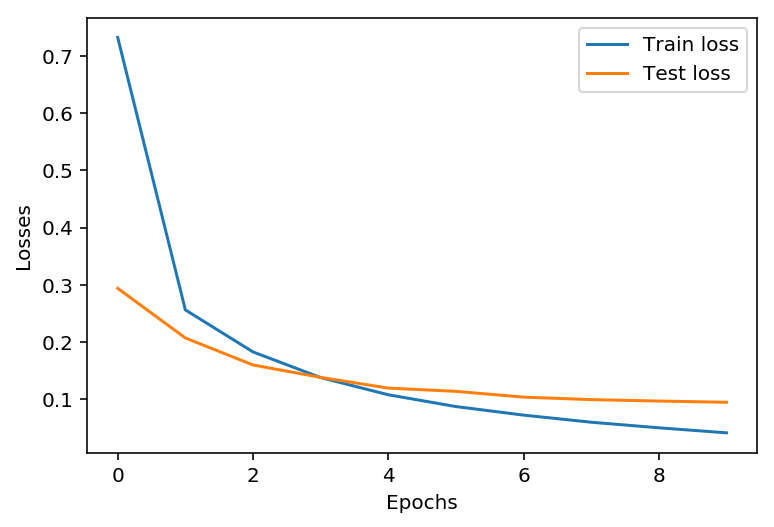

In [89]:
def SGD_mom(epochs):
        #Building the network
    model=nn.Sequential(nn.Linear(784,256),  #layer 1 with 256 neurons.
                        nn.ReLU(),
                        nn.Linear(256,64), #layer 2 with 64 neurons.
                        nn.ReLU(),
                        nn.Linear(64,10),
                        nn.LogSoftmax(dim=1)) 
    optimizer=optim.SGD(model.parameters(),momentum=0.9,nesterov=True,lr=0.01) #SGD optimiser
    criterion=nn.NLLLoss()  #loss
    
    print("No Of Parameters",sum([p.numel() for p in model.parameters()]))

    images, labels = next(iter(train_loader))
    images = images.view(images.shape[0], -1)

    logits = model(images)
    loss = criterion(logits, labels)


    loss.backward()  #backward loss

    #train
    train_losses,test_losses=[],[]
    for e in range(epochs):  
        running_loss=0
        for images,labels in train_loader:
            optimizer.zero_grad()
            log_ps=model(images)
            loss=criterion(log_ps,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()

        else:
            test_loss=0
            accuracy=0

            with torch.no_grad():
                model.eval()
                for images,labels in test_loader:
                    log_ps=model(images)
                    test_loss+=criterion(log_ps,labels)
                    ps=torch.exp(log_ps)
                    top_p,top_class=ps.topk(1,dim=1)
                    equals=top_class==labels.view(*top_class.shape)
                    accuracy+=torch.mean(equals.type(torch.FloatTensor))
            model.train()
            train_losses.append(running_loss/len(train_loader))  #calculating train loss
            test_losses.append(test_loss/len(test_loader))       #calculating test loss

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
                  "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))
    plt.plot(np.arange(epochs),train_losses,label='Train loss')
    plt.plot(np.arange(epochs),test_losses,label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Losses')
    plt.legend()
    plt.show()
SGD_mom(10)

**Network 6(b)**
- Number of layers:2.
    - Layer 1 : 256 neurons.
    - Layer 2:  64  neurons
- optimiser : SGD(momemtum=0.9,nesterov=True)
- Activation function : ReLU
- Epochs: 5

No Of Parameters 218058
Epoch: 1/5..  Training Loss: 0.738..  Test Loss: 0.295..  Test Accuracy: 0.912
Epoch: 2/5..  Training Loss: 0.260..  Test Loss: 0.212..  Test Accuracy: 0.935
Epoch: 3/5..  Training Loss: 0.186..  Test Loss: 0.172..  Test Accuracy: 0.948
Epoch: 4/5..  Training Loss: 0.143..  Test Loss: 0.157..  Test Accuracy: 0.950
Epoch: 5/5..  Training Loss: 0.113..  Test Loss: 0.123..  Test Accuracy: 0.962


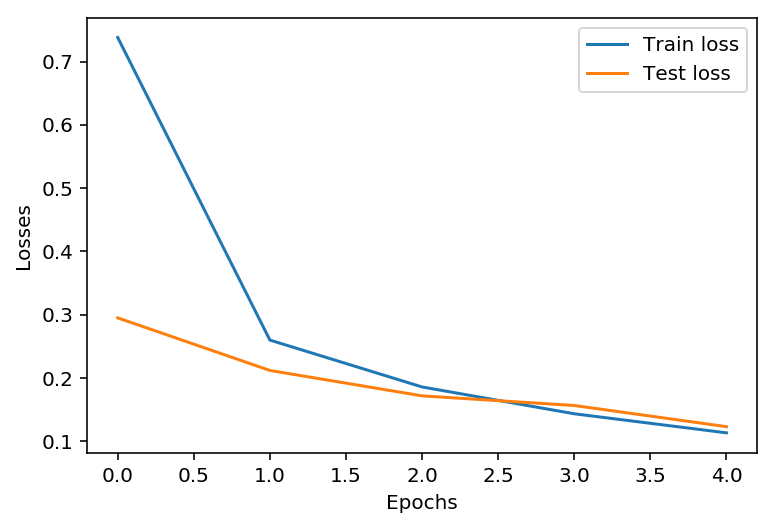

In [90]:
SGD_mom(5)

**Observations:**
- As number of epochs increases the difference between train and test loss decreases.Hence the model does not overfit.
- Epochs:10
    - Validation Accuracy : 97.1 %
- Epochs:5
    - Validation Accuracy : 96.2 %

**Network 7(a)**
- Number of layers:2.
    - Layer 1 : 128 neurons.
    - Layer 2:  64  neurons
- optimiser : SGD(momemtum=0.8,nesterov=True,lr=0.02)
- Activation function : ReLU
- Epochs: 10

No Of Parameters 109386
Epoch: 1/10..  Training Loss: 0.746..  Test Loss: 0.321..  Test Accuracy: 0.902
Epoch: 2/10..  Training Loss: 0.272..  Test Loss: 0.224..  Test Accuracy: 0.932
Epoch: 3/10..  Training Loss: 0.198..  Test Loss: 0.180..  Test Accuracy: 0.946
Epoch: 4/10..  Training Loss: 0.151..  Test Loss: 0.142..  Test Accuracy: 0.957
Epoch: 5/10..  Training Loss: 0.121..  Test Loss: 0.126..  Test Accuracy: 0.962
Epoch: 6/10..  Training Loss: 0.097..  Test Loss: 0.118..  Test Accuracy: 0.963
Epoch: 7/10..  Training Loss: 0.081..  Test Loss: 0.111..  Test Accuracy: 0.967
Epoch: 8/10..  Training Loss: 0.069..  Test Loss: 0.104..  Test Accuracy: 0.969
Epoch: 9/10..  Training Loss: 0.057..  Test Loss: 0.099..  Test Accuracy: 0.969
Epoch: 10/10..  Training Loss: 0.050..  Test Loss: 0.097..  Test Accuracy: 0.971


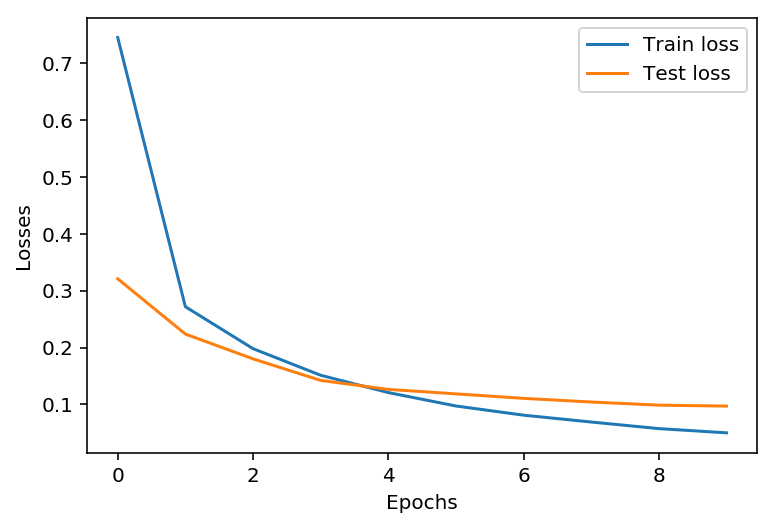

In [91]:
def SGD_mom2(epochs):
        #Building the network
    model=nn.Sequential(nn.Linear(784,128),  #layer 1 with 128 neurons.
                        nn.ReLU(),
                        nn.Linear(128,64), #layer 2 with 64 neurons.
                        nn.ReLU(),
                        nn.Linear(64,10),
                        nn.LogSoftmax(dim=1)) 
    optimizer=optim.SGD(model.parameters(),momentum=0.8,nesterov=True,lr=0.02) #SGD optimiser
    criterion=nn.NLLLoss()  #loss
    
    print("No Of Parameters",sum([p.numel() for p in model.parameters()]))

    images, labels = next(iter(train_loader))
    images = images.view(images.shape[0], -1)

    logits = model(images)
    loss = criterion(logits, labels)


    loss.backward()  #backward loss

    #train
    train_losses,test_losses=[],[]
    for e in range(epochs):  
        running_loss=0
        for images,labels in train_loader:
            optimizer.zero_grad()
            log_ps=model(images)
            loss=criterion(log_ps,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()

        else:
            test_loss=0
            accuracy=0

            with torch.no_grad():
                model.eval()
                for images,labels in test_loader:
                    log_ps=model(images)
                    test_loss+=criterion(log_ps,labels)
                    ps=torch.exp(log_ps)
                    top_p,top_class=ps.topk(1,dim=1)
                    equals=top_class==labels.view(*top_class.shape)
                    accuracy+=torch.mean(equals.type(torch.FloatTensor))
            model.train()
            train_losses.append(running_loss/len(train_loader))  #calculating train loss
            test_losses.append(test_loss/len(test_loader))       #calculating test loss

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
                  "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))
    plt.plot(np.arange(epochs),train_losses,label='Train loss')
    plt.plot(np.arange(epochs),test_losses,label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Losses')
    plt.legend()
    plt.show()
SGD_mom2(10)

**Network 7(b)**
- Number of layers:2.
    - Layer 1 : 128 neurons.
    - Layer 2:  64  neurons
- optimiser : SGD(momemtum=0.8,nesterov=True,lr=0.02)
- Activation function : ReLU
- Epochs: 5

No Of Parameters 109386
Epoch: 1/5..  Training Loss: 0.687..  Test Loss: 0.307..  Test Accuracy: 0.907
Epoch: 2/5..  Training Loss: 0.264..  Test Loss: 0.219..  Test Accuracy: 0.933
Epoch: 3/5..  Training Loss: 0.189..  Test Loss: 0.184..  Test Accuracy: 0.945
Epoch: 4/5..  Training Loss: 0.145..  Test Loss: 0.146..  Test Accuracy: 0.956
Epoch: 5/5..  Training Loss: 0.116..  Test Loss: 0.125..  Test Accuracy: 0.963


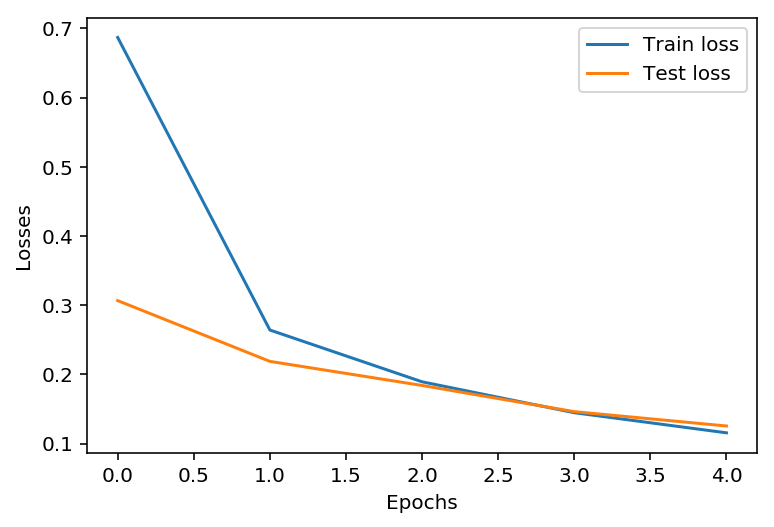

In [92]:
SGD_mom2(5)

**Observations:**
- As number of epochs increases the difference between train and test loss decreases.Hence the model does not overfit.
- Epochs:10
    - Validation Accuracy : 97.1 %
- Epochs:5
    - Validation Accuracy : 96.3 %

**Network 8(a)**
- Number of layers:2.
    - Layer 1 : 128 neurons.
    - Layer 2:  64  neurons
- optimiser : RmsProp
- Activation function : ReLU
- Epochs: 10

No Of Parameters 109386
Epoch: 1/10..  Training Loss: 0.651..  Test Loss: 0.221..  Test Accuracy: 0.938
Epoch: 2/10..  Training Loss: 0.221..  Test Loss: 0.212..  Test Accuracy: 0.937
Epoch: 3/10..  Training Loss: 0.182..  Test Loss: 0.200..  Test Accuracy: 0.944
Epoch: 4/10..  Training Loss: 0.158..  Test Loss: 0.193..  Test Accuracy: 0.946
Epoch: 5/10..  Training Loss: 0.145..  Test Loss: 0.233..  Test Accuracy: 0.943
Epoch: 6/10..  Training Loss: 0.139..  Test Loss: 0.177..  Test Accuracy: 0.955
Epoch: 7/10..  Training Loss: 0.123..  Test Loss: 0.199..  Test Accuracy: 0.955
Epoch: 8/10..  Training Loss: 0.123..  Test Loss: 0.183..  Test Accuracy: 0.954
Epoch: 9/10..  Training Loss: 0.114..  Test Loss: 0.204..  Test Accuracy: 0.951
Epoch: 10/10..  Training Loss: 0.108..  Test Loss: 0.222..  Test Accuracy: 0.952


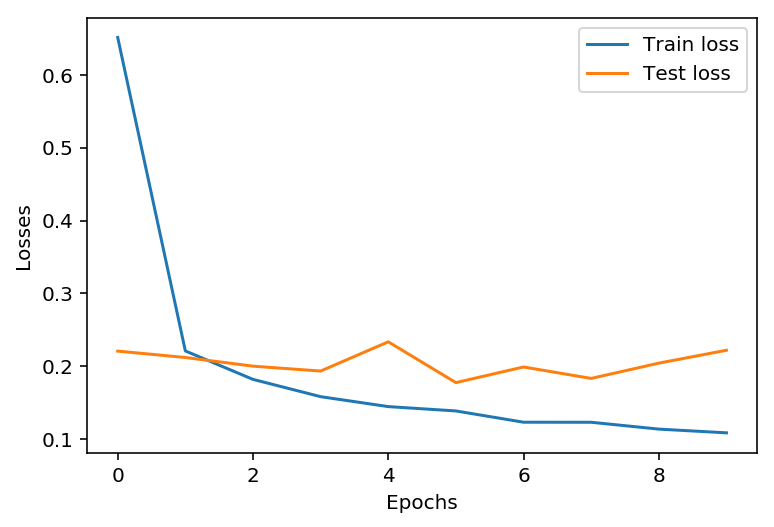

In [93]:
def RmsProp(epochs):
        #Building the network
    model=nn.Sequential(nn.Linear(784,128),  #layer 1 with 128 neurons.
                        nn.ReLU(),
                        nn.Linear(128,64), #layer 2 with 64 neurons.
                        nn.ReLU(),
                        nn.Linear(64,10),
                        nn.LogSoftmax(dim=1)) 
    optimizer=optim.RMSprop(model.parameters(),lr=0.01) #RmsProp optimiser
    criterion=nn.NLLLoss()  #loss
    
    print("No Of Parameters",sum([p.numel() for p in model.parameters()]))

    images, labels = next(iter(train_loader))
    images = images.view(images.shape[0], -1)

    logits = model(images)
    loss = criterion(logits, labels)


    loss.backward()  #backward loss

    #train
    train_losses,test_losses=[],[]
    for e in range(epochs):  
        running_loss=0
        for images,labels in train_loader:
            optimizer.zero_grad()
            log_ps=model(images)
            loss=criterion(log_ps,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()

        else:
            test_loss=0
            accuracy=0

            with torch.no_grad():
                model.eval()
                for images,labels in test_loader:
                    log_ps=model(images)
                    test_loss+=criterion(log_ps,labels)
                    ps=torch.exp(log_ps)
                    top_p,top_class=ps.topk(1,dim=1)
                    equals=top_class==labels.view(*top_class.shape)
                    accuracy+=torch.mean(equals.type(torch.FloatTensor))
            model.train()
            train_losses.append(running_loss/len(train_loader))  #calculating train loss
            test_losses.append(test_loss/len(test_loader))       #calculating test loss

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
                  "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))
    plt.plot(np.arange(epochs),train_losses,label='Train loss')
    plt.plot(np.arange(epochs),test_losses,label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Losses')
    plt.legend()
    plt.show()
RmsProp(10)

**Network 8(b)**
- Number of layers:2.
    - Layer 1 : 128 neurons.
    - Layer 2:  64  neurons
- optimiser : RmsProp
- Activation function : ReLU
- Epochs: 5

No Of Parameters 109386
Epoch: 1/5..  Training Loss: 0.585..  Test Loss: 0.215..  Test Accuracy: 0.937
Epoch: 2/5..  Training Loss: 0.201..  Test Loss: 0.178..  Test Accuracy: 0.948
Epoch: 3/5..  Training Loss: 0.166..  Test Loss: 0.165..  Test Accuracy: 0.954
Epoch: 4/5..  Training Loss: 0.143..  Test Loss: 0.158..  Test Accuracy: 0.959
Epoch: 5/5..  Training Loss: 0.129..  Test Loss: 0.170..  Test Accuracy: 0.959


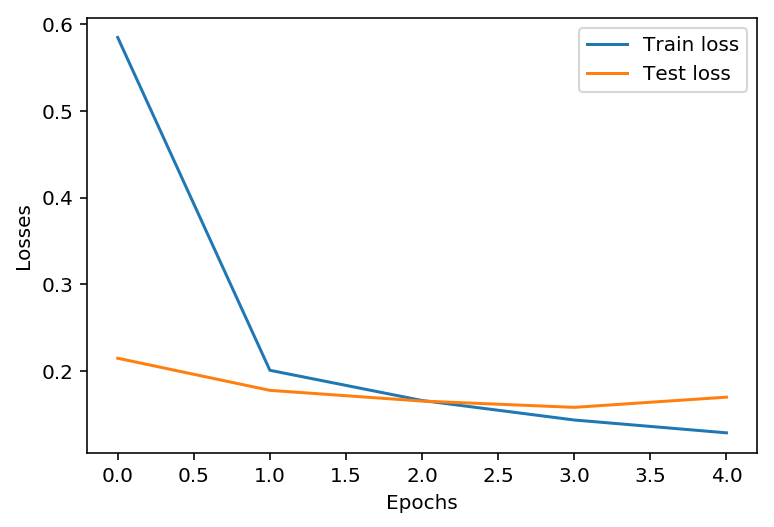

In [94]:
RmsProp(5)

**Observations:**
- Epochs:10
    - Validation Accuracy : 95.2 %
- Epochs:5
    - Validation Accuracy : 95.9 %

**Network 9(a)**
- Number of layers:2.
    - Layer 1 : 512 neurons.
    - Layer 2:  64  neurons
- optimiser : AdaDelta
- Activation function : ReLU
- Epochs: 10

No Of Parameters 435402
Epoch: 1/10..  Training Loss: 0.528..  Test Loss: 0.280..  Test Accuracy: 0.914
Epoch: 2/10..  Training Loss: 0.220..  Test Loss: 0.180..  Test Accuracy: 0.944
Epoch: 3/10..  Training Loss: 0.151..  Test Loss: 0.142..  Test Accuracy: 0.957
Epoch: 4/10..  Training Loss: 0.113..  Test Loss: 0.126..  Test Accuracy: 0.959
Epoch: 5/10..  Training Loss: 0.088..  Test Loss: 0.103..  Test Accuracy: 0.970
Epoch: 6/10..  Training Loss: 0.071..  Test Loss: 0.101..  Test Accuracy: 0.969
Epoch: 7/10..  Training Loss: 0.057..  Test Loss: 0.093..  Test Accuracy: 0.972
Epoch: 8/10..  Training Loss: 0.047..  Test Loss: 0.102..  Test Accuracy: 0.969
Epoch: 9/10..  Training Loss: 0.038..  Test Loss: 0.083..  Test Accuracy: 0.974
Epoch: 10/10..  Training Loss: 0.031..  Test Loss: 0.081..  Test Accuracy: 0.976


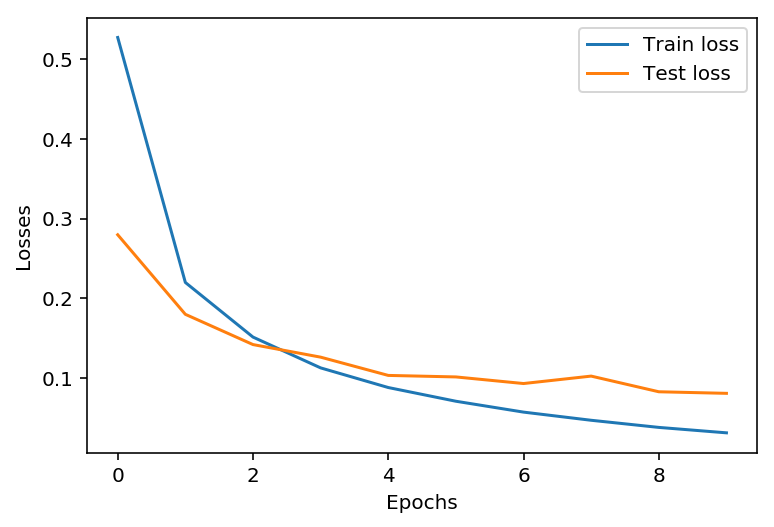

In [95]:
def AdaDelta(epochs):
        #Building the network
    model=nn.Sequential(nn.Linear(784,512),  #layer 1 with 512 neurons.
                        nn.ReLU(),
                        nn.Linear(512,64), #layer 2 with 64 neurons.
                        nn.ReLU(),
                        nn.Linear(64,10),
                        nn.LogSoftmax(dim=1)) 
    optimizer=optim.Adadelta(model.parameters(),lr=0.25) #RmsProp optimiser
    criterion=nn.NLLLoss()  #loss
    
    print("No Of Parameters",sum([p.numel() for p in model.parameters()]))

    images, labels = next(iter(train_loader))
    images = images.view(images.shape[0], -1)

    logits = model(images)
    loss = criterion(logits, labels)


    loss.backward()  #backward loss

    #train
    train_losses,test_losses=[],[]
    for e in range(epochs):  
        running_loss=0
        for images,labels in train_loader:
            optimizer.zero_grad()
            log_ps=model(images)
            loss=criterion(log_ps,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()

        else:
            test_loss=0
            accuracy=0

            with torch.no_grad():
                model.eval()
                for images,labels in test_loader:
                    log_ps=model(images)
                    test_loss+=criterion(log_ps,labels)
                    ps=torch.exp(log_ps)
                    top_p,top_class=ps.topk(1,dim=1)
                    equals=top_class==labels.view(*top_class.shape)
                    accuracy+=torch.mean(equals.type(torch.FloatTensor))
            model.train()
            train_losses.append(running_loss/len(train_loader))  #calculating train loss
            test_losses.append(test_loss/len(test_loader))       #calculating test loss

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
                  "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))
    plt.plot(np.arange(epochs),train_losses,label='Train loss')
    plt.plot(np.arange(epochs),test_losses,label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Losses')
    plt.legend()
    plt.show()
AdaDelta(10)

**Network 9(b)**
- Number of layers:2.
    - Layer 1 : 512 neurons.
    - Layer 2:  64  neurons
- optimiser : AdaDelta
- Activation function : ReLU
- Epochs: 5

No Of Parameters 435402
Epoch: 1/5..  Training Loss: 0.515..  Test Loss: 0.257..  Test Accuracy: 0.924
Epoch: 2/5..  Training Loss: 0.218..  Test Loss: 0.177..  Test Accuracy: 0.944
Epoch: 3/5..  Training Loss: 0.149..  Test Loss: 0.141..  Test Accuracy: 0.955
Epoch: 4/5..  Training Loss: 0.113..  Test Loss: 0.128..  Test Accuracy: 0.962
Epoch: 5/5..  Training Loss: 0.089..  Test Loss: 0.114..  Test Accuracy: 0.969


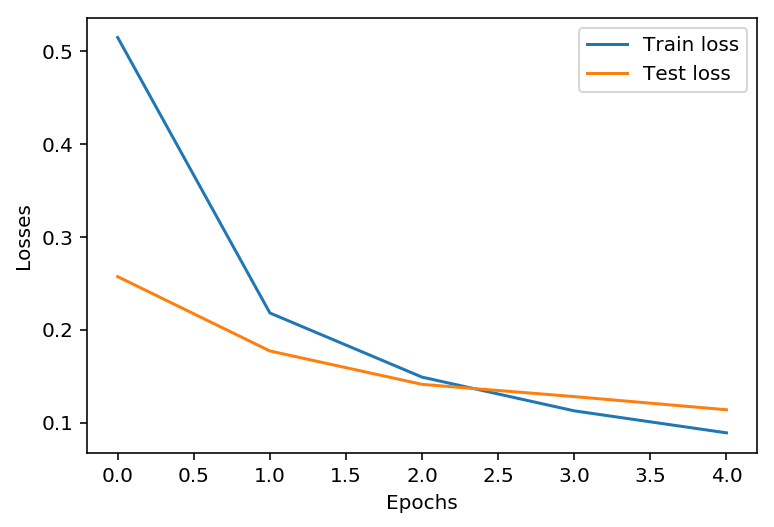

In [96]:
AdaDelta(5)

**Observations:**
- Epochs:10
    - Validation Accuracy : 97.6 %
- Epochs:5
    - Validation Accuracy : 96.9 %